# Support Vector Regression (SVR)

## Importing the libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [31]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:,-1].values
# If you want y as a 2D array, do the below: 
#y = dataset.iloc[:, -1:].values

In [32]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [33]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [34]:
#alternate method to convert y to 2D array 
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler 

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [36]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [37]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [38]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

## Predicting a new result

In [39]:
# Scale "6.5 years" to correct form => sc_X
# Scale the result back from y's scaling => sc_y 

sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

## Visualising the SVR results

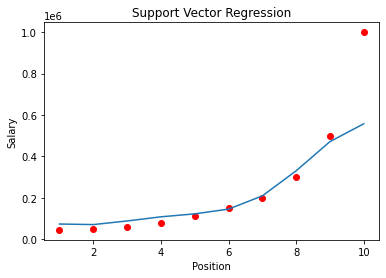

In [51]:
#scatter plot the points. 
#plot the regression line

#get the original y for scatter plot
y_plot = sc_y.inverse_transform(y)

#get the prediction results
y_pred = sc_y.inverse_transform(regressor.predict(X))

#get the original X for scatter plot and graph
x_plot = sc_X.inverse_transform(X)

plt.scatter(x_plot,y_plot,color='red')
plt.plot(x_plot,y_pred)
plt.title("Support Vector Regression")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

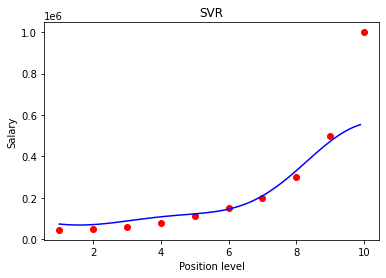

In [56]:
# a smoother change in x results in a smoother curve
X_grid = np.arange(min(x_plot), max(x_plot), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x_plot, y_plot, color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('SVR')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()